# Dataset of 1D atoms

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
def get_energy(filename):
    file = open(filename,'r')
    data = file.readlines()
    file.close()
    filetype = filename.split('/')[-1] 
    if  filetype == 'imag_tprop.out':
        energy = float(data[-2].split('=')[1])
    elif filetype == 'scf_cycle.out':
        energy = float(data[-1].split(':')[-1])
    elif filetype == 'exact.log':
        energy = float(data[-2].split(':')[-1])
    else:
        energy = np.NaN
    return energy

In [28]:
alpha = ['1e00', '1e-1', '1e-2']
beta = ['1e00', '1e-1', '1e-2']
atom_nos = [1,2,3,4,5,6]
ngrid = [32, 64, 128,256]
atoms_dict = {}
i = 1
for z in atom_nos:
    atomdir = 'z_{z}'.format(z=z)
    for a in alpha:
        for b in beta:
            jobdir = 'alpha_{a}_beta_{b}'.format(a=a,b=b)
            for n in ngrid:
                ndir = 'n_{n}'.format(n=n)
                path='../{atomdir}/{jobdir}/{ndir}'.format(atomdir=atomdir,jobdir=jobdir, ndir=ndir)
                if n>128:
                    try:
                        exact_filename=os.path.join(path,'imag_tprop.out')
                        e_exact = get_energy(exact_filename)
                    except:
                        e_exact = 0.0
                else:
                    exact_filename = os.path.join(path,'exact.log')
                    e_exact = get_energy(exact_filename)
                scf_filename = os.path.join(path,'scf_cycle.out')
                e_scf = get_energy(scf_filename)
                atoms_dict[i] = [int(z), float(a), float(b), int(n), e_scf, e_exact]
                i += 1

In [29]:
columns = ['z','alpha','beta', 'ngrid','e_scf','e_exact']
df = pd.DataFrame.from_dict(atoms_dict, orient='index')
df.columns=columns

In [30]:
print(df)

     z  alpha  beta  ngrid      e_scf    e_exact
1    1   1.00  1.00     32  -0.688122  -0.727859
2    1   1.00  1.00     64  -0.692022  -0.730726
3    1   1.00  1.00    128  -0.692025  -0.730727
4    1   1.00  1.00    256  -0.692024  -0.730726
5    1   1.00  0.10     32  -0.370723  -0.650037
..  ..    ...   ...    ...        ...        ...
212  6   0.01  0.10    256 -69.764672   0.000000
213  6   0.01  0.01     32 -17.680556 -20.475360
214  6   0.01  0.01     64 -36.195000 -37.049447
215  6   0.01  0.01    128 -57.145618 -57.286531
216  6   0.01  0.01    256 -66.297875   0.000000

[216 rows x 6 columns]


In [26]:
df2 = df[df['z']==2][['e_scf','e_exact']]

<Axes: >

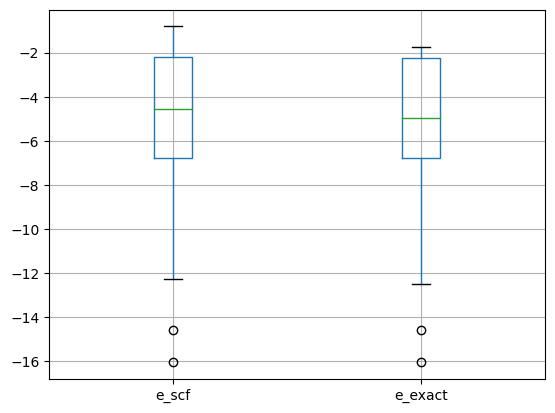

In [27]:
df2.boxplot()